<a href="https://colab.research.google.com/github/eduardarsimoes/lae1/blob/main/Mania/ManiaDS_Sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Mania**
---
### **LAB. EXT 2020/2** - Eduarda Simões, Serenna Ferrari, Thais de Souza


### Importando bibliotecas e carregando dataset

---





In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=c182a160eae5f28bcba0bd3fd94941f7c374d87e708c6b264c65714f550c98b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-pefteev4/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
import pandas as pd
import sklearn 
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn import model_selection
import pandas_profiling 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

### Carregando dataset e resumo de dados

---

In [ ]:
url = "https://raw.githubusercontent.com/eduardarsimoes/lae1/main/Mania/Variaveis_Mania%2BSC%2BCC.csv"
dataset = pd.read_csv(url, header=0, sep = ";")

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
print(dataset.head())

   M1  M1A  M3  M3A  M3B1  M3B2  M3C  M3D1  M3D2  M4  M5  M6  M6A  M6B1  M6B2  \
0 NaN  NaN NaN  NaN   NaN   NaN  NaN   NaN   NaN NaN NaN NaN  NaN   NaN   NaN   
1 NaN  NaN NaN  NaN   NaN   NaN  NaN   NaN   NaN NaN NaN NaN  NaN   NaN   NaN   
2 NaN  NaN NaN  NaN   NaN   NaN  NaN   NaN   NaN NaN NaN NaN  NaN   NaN   NaN   
3 NaN  NaN NaN  NaN   NaN   NaN  NaN   NaN   NaN NaN NaN NaN  NaN   NaN   NaN   
4 NaN  NaN NaN  NaN   NaN   NaN  NaN   NaN   NaN NaN NaN NaN  NaN   NaN   NaN   

   M6C  M6D1  M6D2  M7A  M7B  M7C  M7D  M7E  M7F  M7G  M7H  M7I  M7J  M7K  \
0  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   M7L  M7M  M7N  M7O  M8  M9  M9A  M9B  M10A  M10

### Pré processamento
---



In [ ]:
#GENERATE THE PROFILING REPORT (EDA) - before analyze
profile = pandas_profiling.ProfileReport(
    dataset, title="Mania Dataset Raw", html={"style": {"full_width": True}}, sort="None",
    correlations={"cramers": {"calculate": False}},
    minimal=True
) 
profile.to_file('mania_raw.html')

#### Analisando dados

In [ ]:
#ANALISANDO DADOS E VERIFICANDO OS NULOS
best_ds = dataset
stat_data = best_ds.describe(include='all').T
stat_data['types'] = dataset.dtypes
stat_data['nulos'] = pd.DataFrame(best_ds.isnull().sum())
stat_data['percent_nulos'] = pd.DataFrame(dataset.isna().mean().round(4) * 100)
stat_data

,count,mean,std,min,25%,50%,75%,max,types,nulos,percent_nulos
M1,128.0,2.343750,1.961991,1.0,1.00,1.0,5.00,9.0,float64,4909,97.46
M1A,42.0,1.666667,0.477119,1.0,1.00,2.0,2.00,2.0,float64,4995,99.17
M3,86.0,2.383721,1.977334,1.0,1.00,1.0,5.00,8.0,float64,4951,98.29
M3A,57.0,94.245614,250.709798,12.0,19.00,26.0,36.00,998.0,float64,4980,98.87
M3B1,57.0,93.157895,283.180961,1.0,2.00,4.0,8.00,998.0,float64,4980,98.87
M3B2,52.0,3.480769,1.179737,1.0,2.00,4.0,4.00,5.0,float64,4985,98.97
M3C,29.0,229.206897,399.708142,12.0,23.00,30.0,45.00,998.0,float64,5008,99.42
M3D1,29.0,243.758621,432.996755,1.0,2.00,3.0,20.00,998.0,float64,5008,99.42
M3D2,22.0,2.772727,1.066004,1.0,2.00,2.5,4.00,4.0,float64,5015,99.56
M4,86.0,3.209302,2.120579,1.0,1.00,5.0,5.00,8.0,float64,4951,98.29


#### Remoção de colunas


In [ ]:
#REMOVENDO COLUNAS ZERADAS OU SEM CONHECIMENTO DOS DADOS
#Retirando as colunas que estão zeradas
dataset.drop(["CC2A04","CC2A05","CC2A06", "CC2A07", "CC2A08", "CC2A09", "CC2A10", "CC2A11", "CC2A12"], axis = 1, inplace = True)

#Retirando as colunas que não sabemos a resposta/pergunta
dataset.drop(["SC1_1", "SC3A", "SC9", "SC19", "SC20A", "SC20_1", "SC20_2", "SC20_3",\
              "SC21", "SC22", "SC29A", "SC33_1", "SC33_2", "SC33_3", "CC2", "CC2A01", \
              "CC2A02", "CC2A03", "CC3", "CC3A", "CC4", "CC5", "CC50A", "CC50B", "CC50C", \
              "CC50D", "CC50E", "CC50I", "CC51", "CC52", "CC53", "CC54"], axis = 1, inplace = True)

#### Dividindo colunas de perguntas gerais das perguntas de Mania


In [ ]:
#SEPARANDO AS COLUNAS GERAIS (SC + CC) E AS COLUNAS DE MANIA(M)
#Para medir correlação de colunas
general_col = dataset.columns[dataset.columns.slice_indexer('SC1','CC55')]
only_gen = dataset[general_col]
print(only_gen.shape)

mania_col = dataset.columns[dataset.columns.slice_indexer('M1','M55')]
only_man = dataset[mania_col]
print(only_man.shape)

(5037, 98)
(5037, 89)


#### Verificando correlação entre colunas (geral com geral e mania com mania)

In [ ]:
#MAPA DE CALOR DAS CORRELAÇÕES
#df_corr = only_man.corr()

#f, ax = pyplot.subplots(figsize=(80, 50))
#sns.heatmap(df_corr, annot=True, fmt=".2f", linewidths=.7, ax=ax);

#Função para retirar e printar quais colunas foram retiradas por possuírem uma 
#Correlação maior que o threshold
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                colname2 = corr_matrix.columns[j] # getting the name of column
                # print(colname, colname2)
                if(colname != 'dsm_man' and colname2 != 'dsm_man'):
                  col_corr.add(colname)
                  if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print(col_corr, len(col_corr))

#Dataset sem colunas gerais altamente correlacionadas
correlation(only_gen, 0.85)
print(only_gen.shape)

#Dataset sem colunas gerais altamente correlacionadas
correlation(only_man, 0.85)
print(only_man.shape)

# Juntando todos novamente
new_ds = pd.concat([only_man, only_gen, dataset['dsm_man']], axis=1 )
correlation(new_ds, 0.85)
print(new_ds.shape)

{'CC23', 'CC31B', 'CC10D'} 3
(5037, 95)
{'M18', 'M45C', 'M19A', 'M30A', 'M48_1', 'M45A', 'M22A', 'M27D', 'M45B', 'M3D1', 'M19D', 'M18C', 'M23', 'M27A', 'M27C', 'M33A', 'M18B', 'M30C', 'M30F', 'M18D1', 'M48A', 'M55', 'M47', 'M6', 'M48', 'M26', 'M30H', 'M29'} 28
(5037, 61)
{'SC26B', 'CC30', 'CC26C', 'SC25A'} 4
(5037, 153)


#### Renomeação de colunas

In [ ]:
#RENOMEANDO AS COLUNAS
only_gen.rename(columns={'SC1': 'AGE', 'SC7': 'have_smoked', 'SC8_1': 'physical_health_rate',  \
                        'SC8_2': 'mental_health_rate', 'SC20': 'had_fear_panic_attack', \
                        'SC26': 'too_worried', 'SC26A': 'too_anxious_nervous',\
                        'SC27A': 'has_animal_phobia', 'SC27D': 'has_claustrophobia',\
                        'SC27E': 'has_height_phobia', 'SC27F': 'has_flying_phobia', \
                        'CC55': 'better_without_help', 'CC49D': 'visits_nurse_nutritionist',\
                        'CC49B': 'visits_psychiatrist_past_year', 'CC49A': 'visits_doctor_past_year', \
                        'CC28G': 'has_chronic_other_pain', 'CC28F': 'has_chronic_headaches', \
                        'CC28E': 'has_chronic_chest_pain', 'CC28D': 'has_chronic_face_or_jaw_pain', \
                        'CC28C': 'has_chronic_joint_pain', 'CC28B': 'has_chronic_stomach_or_abdomen_pain', \
                        'CC28A': 'has_chronic_neck_or_back_pain', 'CC26C': 'difficulty_getting_up_past_year',\
                        'CC24E': 'feel_fatigued_past_12_months', 'CC22': 'has_problem_sleep_past_52_weeks', \
                        'CC9': 'times_see_doctor_year', 'CC1S': 'had_epilepsy_or_seizures', \
                        'CC1Q': 'had_neurological_problem', 'CC1M': 'had_parasitic_disease', \
                        'CC1L': 'had_chronic_lung_disease', 'CC1E': 'had_seasonal_allergies',}, inplace = True)
only_gen.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AGE,SC2,SC2A,SC3,have_smoked,physical_health_rate,mental_health_rate,had_fear_panic_attack,SC23,SC24,SC25,SC25A,too_worried,too_anxious_nervous,SC26B,has_animal_phobia,SC27B,SC27C,has_claustrophobia,has_height_phobia,has_flying_phobia,SC28,SC29,SC30,SC31,SC32,SC33,SC34,SC35,CC1A,CC1B,CC1C,CC1D,had_seasonal_allergies,CC1F,CC1G,CC1H,CC1I,CC1J,CC1K,had_chronic_lung_disease,had_parasitic_disease,CC1N,CC1O,CC1P,had_neurological_problem,CC1R,had_epilepsy_or_seizures,CC1T,CC7,CC8,times_see_doctor_year,CC10A,CC10B,CC10C,CC11,CC12,CC20A,CC20B,CC20C,CC20D,CC21,has_problem_sleep_past_52_weeks,CC24B,CC24C,feel_fatigued_past_12_months,CC24F,CC24G,CC24H,CC25,CC26A,CC26B,difficulty_getting_up_past_year,CC27,has_chronic_neck_or_back_pain,has_chronic_stomach_or_abdomen_pain,has_chronic_joint_pain,has_chronic_face_or_jaw_pain,has_chronic_chest_pain,has_chronic_headaches,has_chronic_other_pain,CC29,CC30,CC31A,CC32,CC33,CC34,CC35,CC48,CC48A,visits_doctor_past_year,visits_psychiatrist_past_year,CC49C,visits_nurse_nutritionist,better_without_help
0,32,4,4.0,5,2,3,3,5,5,5,5,NaN,1,NaN,NaN,1,5,5,5,1,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,1,11.0,0.0,0.0,0.0,0.0,1.0,NaN,1,1,1,5,1,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1.0,0,0,4,2,30
1,31,8,4.0,5,3,3,3,1,1,5,5,NaN,1,NaN,NaN,1,5,1,1,1,5,1,1,1,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,1,1,1,3.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,3,0,0,0,80
2,60,9,4.0,1,2,4,4,1,1,5,1,5.0,1,NaN,NaN,1,1,1,5,1,1,1,1,1,1,1,1,1,1,5,1,1,1,5,5,5,5,1,5,1,5,5,1,5,5,5,5,5,5,1,4.0,4.0,8.0,5.0,7.0,2.0,10.0,1,5,1,1,1,52.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,10.0,30.0,8.0,2.0,5.0,5.0,5,1.0,4,0,2,2,1
3,34,5,4.0,5,3,3,2,1,5,5,5,NaN,5,5.0,5.0,5,5,5,5,5,8,5,5,5,5,5,5,5,5,5,1,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,4.0,6.0,8.0,9.0,0.0,2.0,240.0,5,5,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,30.0,24.0,10.0,4.0,7.0,2.0,1,NaN,0,0,12,7,2
4,84,41,4.0,4,3,3,2,5,5,5,1,5.0,1,NaN,NaN,5,1,5,1,1,5,1,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,4.0,3.0,0.0,0.0,0.0,1.0,NaN,1,1,1,5,1,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,3.0,20.0,5.0,5.0,5.0,10.0,1,NaN,2,0,2,4,6


#### Balanceando o dataset

In [ ]:
#VERIFICANDO O BALANCEAMENTO
print(new_ds.groupby('dsm_man').size())

dsm_man
1      35
5    5002
dtype: int64


In [ ]:
#Excluindo linhas que não há resposta para nenhuma pergunta específica de Mania
man_cols = new_ds.columns[new_ds.columns.slice_indexer('M1','M54')]
new_ds = new_ds.dropna(subset=man_cols, axis=0, how="all")

#Verificando balanceamento após remoção de linhas
print(new_ds.groupby('dsm_man').size())
new_ds.shape

dsm_man
1     35
5    673
dtype: int64


(708, 153)

Random over-sampling:
5    673
1    673
Name: dsm_man, dtype: int64


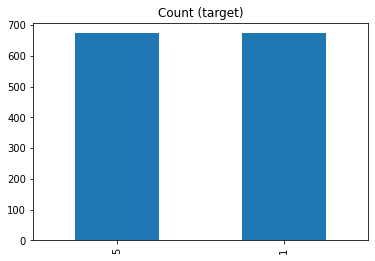

In [ ]:
# Oversampling
# Class count
count_class_0, count_class_1 = new_ds['dsm_man'].value_counts()

# Divide by class
# Has mania, minority class
df_class_1 = new_ds[new_ds['dsm_man'] == 1]
# Doesn't have, majority
df_class_0 = new_ds[new_ds['dsm_man'] == 5]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['dsm_man'].value_counts())

df_test_over['dsm_man'].value_counts().plot(kind='bar', title='Count (target)');


#Código de UNDERSAMPLING

#Conta as classes
# teste_undersampling = new_ds
# count_class_5, count_class_1 = teste_undersampling.dsm_man.value_counts()

# # Divide por classe
# df_class_5 = teste_undersampling[teste_undersampling['dsm_man'] == 5]
# df_class_1 = teste_undersampling[teste_undersampling['dsm_man'] == 1]
# df_class_5_under = df_class_5.sample(count_class_1)
# df_test_under = pd.concat([df_class_5_under, df_class_1], axis=0)
# print('Random under-sampling:')
# print(df_test_under.dsm_man.value_counts())
# df_test_under.dsm_man.value_counts().plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

#### Verificação de nulos e preenchimento

In [ ]:
#VERIFICANDO A SITUAÇÃO DOS NULOS E DO DATASET
best_ds = df_test_over
stat_data = best_ds.describe(include='all').T
stat_data['nulos'] = pd.DataFrame(best_ds.isnull().sum())
stat_data['percent_nulos'] = pd.DataFrame(df_test_over.isna().mean().round(4) * 100)
stat_data


,count,mean,std,min,25%,50%,75%,max,nulos,percent_nulos
M1,395.0,1.982278,1.747279,1.0,1.0,1.0,1.00,9.0,951,70.65
M1A,96.0,1.291667,0.456916,1.0,1.0,1.0,2.00,2.0,1250,92.87
M3,299.0,1.397993,1.228355,1.0,1.0,1.0,1.00,8.0,1047,77.79
M3A,270.0,40.581481,118.048029,12.0,16.0,28.0,36.75,998.0,1076,79.94
M3B1,270.0,24.607407,134.100977,1.0,1.0,5.0,8.00,998.0,1076,79.94
M3B2,265.0,3.924528,0.954437,1.0,4.0,4.0,5.00,5.0,1081,80.31
M3C,29.0,229.206897,399.708142,12.0,23.0,30.0,45.00,998.0,1317,97.85
M3D2,22.0,2.772727,1.066004,1.0,2.0,2.5,4.00,4.0,1324,98.37
M4,299.0,2.933110,2.037124,1.0,1.0,1.0,5.00,8.0,1047,77.79
M5,1019.0,2.161923,1.847922,1.0,1.0,1.0,5.00,9.0,327,24.29


In [ ]:
#PREENCHENDO OS NULOS COM A TÉCNICA DE "Input last observation"
df_test_over.fillna(method='ffill', inplace=True) # Valor linha anterior

best_ds = df_test_over
stat_data = best_ds.describe(include='all').T
stat_data['nulos'] = pd.DataFrame(best_ds.isnull().sum())
stat_data['percent_nulos'] = pd.DataFrame(df_test_over.isna().mean().round(4) * 100)
print(stat_data)

# Como ainda sobraram nulos, constante global: 0
df_test_over = df_test_over.fillna(0)

          count        mean         std   min   25%   50%     75%    max  \
M1       1345.0    2.097398    1.818441   1.0   1.0   1.0    5.00    9.0   
M1A      1345.0    1.465428    0.498989   1.0   1.0   1.0    2.00    2.0   
M3       1341.0    1.937360    1.708787   1.0   1.0   1.0    1.00    8.0   
M3A      1323.0   59.555556  178.408175  12.0  18.0  26.0   36.00  998.0   
M3B1     1323.0   56.145881  217.723087   1.0   1.0   5.0    8.00  998.0   
M3B2     1323.0    3.879063    1.027846   1.0   3.0   4.0    5.00    5.0   
M3C      1341.0  111.855332  246.393675  12.0  38.0  51.0   51.00  998.0   
M3D2     1341.0    2.839672    0.692459   1.0   2.0   3.0    3.00    4.0   
M4       1341.0    3.249814    2.028033   1.0   1.0   5.0    5.00    8.0   
M5       1346.0    2.056464    1.803695   1.0   1.0   1.0    5.00    9.0   
M6A      1346.0   74.033432  196.386705  10.0  25.0  34.0   41.00  998.0   
M6B1     1346.0  103.182021  296.449702   1.0   2.0   4.0    8.00  998.0   
M6B2     134

In [ ]:
#GENERATE THE PROFILING REPORT (EDA)
df_test_over.reset_index(drop=True, inplace=True)
profile = pandas_profiling.ProfileReport(
    df_test_over, 
    title         = "Mania Dataset", 
    html          = {"style": {"full_width": True}}, sort="None",
    correlations  = {"cramers": {"calculate": False}}, minimal=True) 
profile.to_file('mania_done.html')

Summarize dataset:   0%|          | 0/161 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Separação de treino e teste com seleção de 30 melhores características

---



In [ ]:
#COM SELEÇÃO DE CARACTERÍSTICAS
x = df_test_over.drop(columns='dsm_man')
y = df_test_over['dsm_man']


#Selecting the best 30 characteristics
sel_            = SelectKBest(chi2, k = 30).fit(x, y)
best_attributes = list(x.columns[sel_.get_support()])
best_df         = df_test_over[best_attributes]
print(best_attributes)

x_train, x_test, y_train, y_test = train_test_split(best_df, df_test_over['dsm_man'], test_size=0.30, random_state=42, shuffle=True)
print("Dados treino: {}".format(x_train.shape))
print("Dados teste: {}".format(x_test.shape))

['M3', 'M3A', 'M3B1', 'M3C', 'M5', 'M6A', 'M6B1', 'M6C', 'M6D1', 'M7D', 'M7L', 'M18A', 'M19B', 'M19C', 'M20', 'M21', 'M21_1', 'M30B', 'M30E', 'M30I', 'M30K', 'CC9', 'CC12', 'CC22', 'CC33', 'CC34', 'CC35', 'CC49A', 'CC49C', 'CC49D']
Dados treino: (942, 30)
Dados teste: (404, 30)


## Criando e treinando o modelo
---



In [ ]:
#TREINANDO
model = LogisticRegression(max_iter = 10500)
model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Criando a matriz de confusão e report

In [ ]:
# Preditos
predicted = model.predict(x_test)

#CRIANDO A MATRIZ DE CONFUSÃO E REPORT
matrix    = confusion_matrix(y_test, predicted)

print('==== Conf. Matrix ====')
print(matrix)

report = classification_report(y_test, predicted)
print('\n==== Report ====')
print(report)

==== Conf. Matrix ====
[[196   2]
 [  6 200]]

==== Report ====
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       198
           5       0.99      0.97      0.98       206

    accuracy                           0.98       404
   macro avg       0.98      0.98      0.98       404
weighted avg       0.98      0.98      0.98       404



## Usando K-FOLD e gerando scores com cross validate

In [ ]:
# Cross Validate
scoring = ['accuracy', 'recall_macro', 'f1_macro', 'precision_macro']
kfold = model_selection.KFold(n_splits = 5, random_state = 5, shuffle = True)
cv_results1 = cross_validate(model, x, y, cv = kfold, scoring = scoring)

print('Accuracy mean:  ', cv_results1['test_accuracy'].mean())
print('Precision mean: ', cv_results1['test_precision_macro'].mean())
print('Recall mean:    ', cv_results1['test_recall_macro'].mean())
print('F1 mean:        ', cv_results1['test_f1_macro'].mean())

Accuracy mean:   0.988112350268484
Precision mean:  0.9883679488576513
Recall mean:     0.9880916848623054
F1 mean:         0.9880871898760344
